## Transfer Learning VGG 16 using Keras

In [2]:
!nvidia-smi

Tue Apr  9 16:21:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
ROOT_PATH = '/content/drive/MyDrive'

In [7]:
!pwd

/content


In [8]:
import os
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive'

In [9]:
!ls

'Colab Notebooks'   data.zip   Screenshot_20231130_210659.jpg


In [10]:
!unzip data.zip

Archive:  data.zip
   creating: data/train/
   creating: data/train/Potato___Early_blight/
  inflating: data/train/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: data/train/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: data/train/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: data/train/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: data/train/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: data/train/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: data/train/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG  
  inflating: data/train/Potato___Early_blight/028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG  
  inflating: data/train/Potato___Early_blight/034959c

In [11]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'data/train'
valid_path = 'data/validation'


In [12]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 3s 0us/step


In [13]:
# don't train existing weights
for layer in vgg16.layers:
  print(layer)

In [14]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [15]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [16]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
  # useful for getting number of output classes
folders = glob('data/train/*')

In [18]:
folders

['data/train/Potato___Early_blight',
 'data/train/Potato___healthy',
 'data/train/Potato___Late_blight']

In [19]:
len(folders)

3

In [21]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [22]:
# view the structure of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 200)               5017800   
                                                                 
 dense_4 (Dense)             (None, 60)                12060     
                                                                 
 dense_5 (Dense)             (None, 3)                 183       
                                                                 
Total params: 19744731 (75.32 MB)
Trainable params: 5030043 (19.19 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [23]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [24]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
!pwd

/content/drive/MyDrive


In [26]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2152 images belonging to 3 classes.


In [28]:
test_set = test_datagen.flow_from_directory('data/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 619 images belonging to 3 classes.


In [29]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
68/68 [==============================] - 51s 601ms/step - loss: 0.7269 - accuracy: 0.7932 - val_loss: 0.1532 - val_accuracy: 0.9418
Epoch 2/10
68/68 [==============================] - 38s 557ms/step - loss: 0.1837 - accuracy: 0.9326 - val_loss: 0.0809 - val_accuracy: 0.9693
Epoch 3/10
68/68 [==============================] - 38s 566ms/step - loss: 0.1318 - accuracy: 0.9507 - val_loss: 0.0663 - val_accuracy: 0.9758
Epoch 4/10
68/68 [==============================] - 38s 559ms/step - loss: 0.0963 - accuracy: 0.9647 - val_loss: 0.0357 - val_accuracy: 0.9903
Epoch 5/10
68/68 [==============================] - 37s 549ms/step - loss: 0.0766 - accuracy: 0.9740 - val_loss: 0.0253 - val_accuracy: 0.9935
Epoch 6/10
68/68 [==============================] - 38s 554ms/step - loss: 0.0663 - accuracy: 0.9782 - val_loss: 0.0684 - val_accuracy: 0.9709
Epoch 7/10
68/68 [==============================] - 37s 547ms/step - loss: 0.0684 - accuracy: 0.9717 - val_loss: 0.0119 - val_accuracy: 0.9984

In [30]:
import matplotlib.pyplot as plt

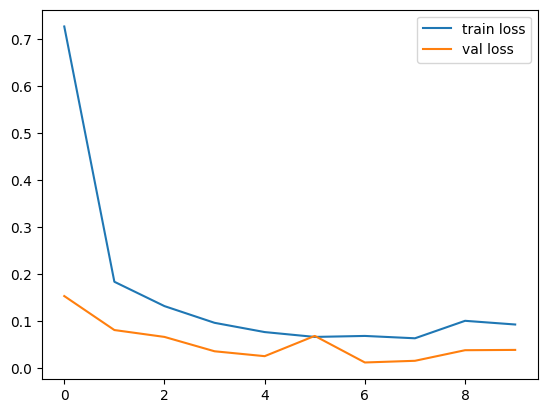

<Figure size 640x480 with 0 Axes>

In [31]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

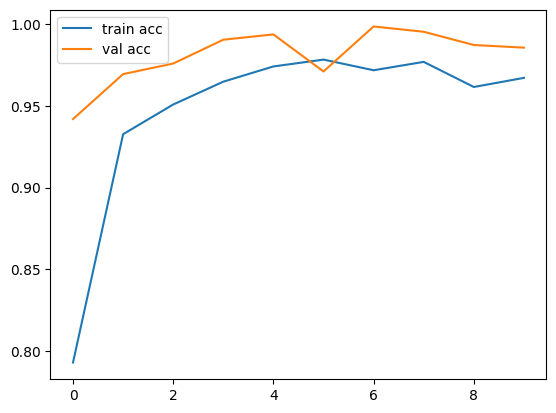

<Figure size 640x480 with 0 Axes>

In [32]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
pwd

'/content/drive/MyDrive'

In [36]:
y_pred = model.predict(test_set)

20/20 [==============================] - 3s 145ms/step


In [37]:
y_pred

array([[1.2687249e-06, 9.9984384e-01, 1.5486710e-04],
       [4.2692453e-04, 9.9686509e-01, 2.7079503e-03],
       [5.2531948e-04, 9.3379760e-01, 6.5677106e-02],
       ...,
       [9.9999619e-01, 3.8007167e-06, 1.5163644e-10],
       [1.4677225e-05, 9.9993682e-01, 4.8460421e-05],
       [1.3819420e-05, 9.9898893e-01, 9.9722925e-04]], dtype=float32)

In [38]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [39]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1,

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [41]:
model=load_model('model_vgg16.h5')

In [42]:
img=image.load_img('/content/78ca2c95-f7b7-43b8-a91f-9ca12ac814e8___RS_Early.B 7137.JPG',target_size=(224,224))

In [43]:
x=image.img_to_array(img)
x

array([[[164., 162., 176.],
        [165., 163., 177.],
        [165., 163., 177.],
        ...,
        [198., 196., 209.],
        [196., 194., 207.],
        [190., 188., 201.]],

       [[163., 161., 175.],
        [164., 162., 176.],
        [165., 163., 177.],
        ...,
        [194., 192., 205.],
        [192., 190., 203.],
        [187., 185., 198.]],

       [[162., 160., 174.],
        [163., 161., 175.],
        [165., 163., 177.],
        ...,
        [190., 188., 201.],
        [189., 187., 200.],
        [186., 184., 197.]],

       ...,

       [[ 99.,  95., 109.],
        [124., 120., 134.],
        [110., 106., 120.],
        ...,
        [134., 132., 145.],
        [136., 134., 147.],
        [134., 132., 145.]],

       [[138., 134., 148.],
        [105., 101., 115.],
        [128., 124., 138.],
        ...,
        [143., 141., 154.],
        [142., 140., 153.],
        [159., 157., 170.]],

       [[169., 165., 179.],
        [117., 113., 127.],
        [131., 1

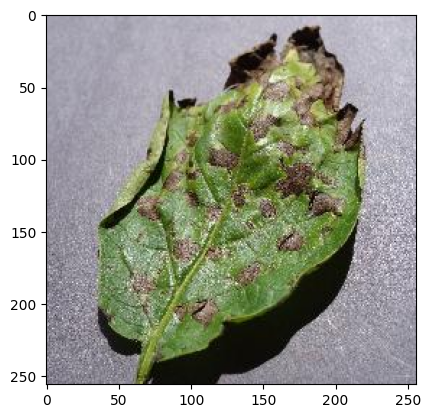

In [44]:
Z = plt.imread('/content/78ca2c95-f7b7-43b8-a91f-9ca12ac814e8___RS_Early.B 7137.JPG')
plt.imshow(Z)

In [45]:
x.shape

(224, 224, 3)

In [46]:
x=x/255

In [47]:
from keras.applications.vgg16 import preprocess_input

In [48]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [49]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[2.0965985e-19, 1.0000000e+00, 4.7398520e-18]], dtype=float32)

In [50]:
result = np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 18ms/step


In [51]:
result[0]

1

In [52]:
if result[0] == 0:
    prediction = 'Late-Blight'
    print(prediction)
if result[0] == 1:
    prediction = 'Early-Blight'
    print(prediction)
else:
    prediction = 'Healthy'
    print(prediction)

Early-Blight
